# Dog and Cat Classification

In [1]:
import torch
import torch.nn as nn


In [2]:
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'dog_cat'

In [3]:
import os 
def walk_through(dir_path):

    for dirpath, dirname, filename in os.walk(dir_path):
        print(f'There are {len(dirname)} directories and {len(filename)} files in {dirpath}')
walk_through(data_path)

There are 1 directories and 0 files in data
There are 2 directories and 0 files in data\dog_cat
There are 2 directories and 0 files in data\dog_cat\test_set
There are 0 directories and 1012 files in data\dog_cat\test_set\cats
There are 0 directories and 1013 files in data\dog_cat\test_set\dogs
There are 2 directories and 0 files in data\dog_cat\training_set
There are 0 directories and 4001 files in data\dog_cat\training_set\cats
There are 0 directories and 4006 files in data\dog_cat\training_set\dogs


In [4]:
test_dir = image_path / 'test_set'
train_dir = image_path / 'training_set'

In [5]:
test_dir

WindowsPath('data/dog_cat/test_set')

Image Height: 295
Image Width: 287
Image Class : dogs
Random Image Path: data\dog_cat\training_set\dogs\dog.1691.jpg


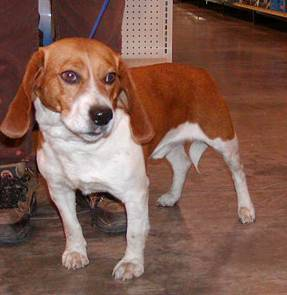

In [6]:
import random 
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path =random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
print(f"Image Class : {image_class}")
print(f"Random Image Path: {random_image_path}")
img

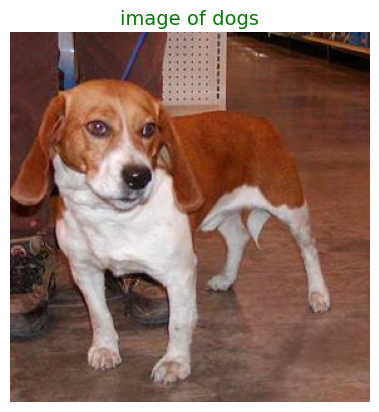

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

plt.imshow(img_as_array)
plt.axis(False)
plt.title(f'image of {image_class}',c='g', fontsize=14);

In [8]:
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


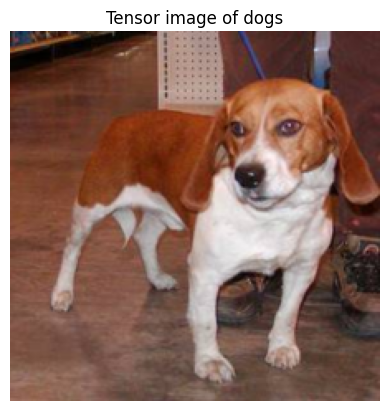

In [9]:
tensor_img = data_transform(img)
tensor_img = tensor_img.permute(1,2,0)
plt.imshow(tensor_img)
plt.title(f'Tensor image of {image_class}');
plt.axis(False);

In [10]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [11]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder(root=train_dir,
                               transform=train_transform,
                               target_transform=None)
test_data = ImageFolder(root=test_dir,
                              transform=test_transform,
                              target_transform=None)
train_data

Dataset ImageFolder
    Number of datapoints: 8005
    Root location: data\dog_cat\training_set
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=False)


In [13]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1dbd1d80620>,
 <torch.utils.data.dataloader.DataLoader at 0x1dbd3716f60>)

In [14]:
def display_random_images(dataset:torch.utils.data.dataset.Dataset,
                          classes: list[str],
                          n: int =10,
                          display_shape: bool=True,
                          seed: int= None):
    if n>10:
        n=10
        print("display shape must be 10 or less than 10")
        display_shape = False
    if seed: 
        random.seed(seed)
    
    random_sample_img = random.sample(range(len(dataset)),k=n)

    plt.figure(figsize=(20,10))

    for i, sample_img in enumerate(random_sample_img):

        target_img, target_label = dataset[sample_img][0], dataset[sample_img][1]

        target_img_adjust = target_img.permute(1,2,0)

        plt.subplot(1,n,i+1)
        plt.imshow(target_img_adjust)
        if classes:
            title = f"class: {classes[target_label]}"
            if display_shape:
                title = title + f"\nshape: {target_img_adjust.shape}"
        plt.title(title,fontsize= 14,c='y')
        plt.axis("off");


In [15]:
class_names = train_data.classes

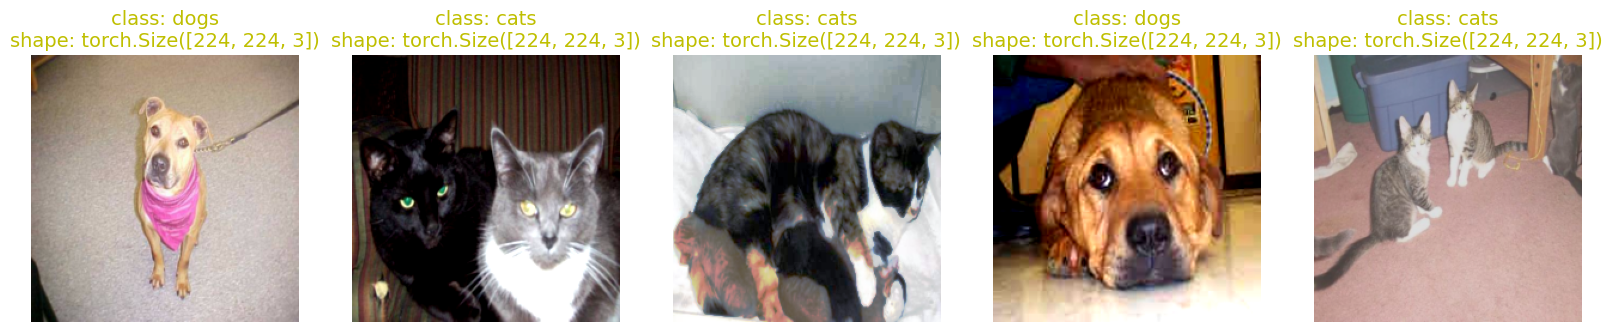

In [16]:
display_random_images(train_data,
                      classes=class_names,
                      n=5,
                      seed=42)

In [66]:
class classification_model(nn.Module):
    
    def __init__(self,
                 input_shape: int,
                 hiddin_unit: int,
                 output_shape: int):
        super().__init__()
        
        self.Conv1= nn.Sequential(
           
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hiddin_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hiddin_unit,
                      out_channels=hiddin_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,
                         stride=2)
        )

        self.Conv2= nn.Sequential(
            
            nn.Conv2d(in_channels=hiddin_unit,
                      out_channels=hiddin_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hiddin_unit,
                      out_channels=hiddin_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.Conv3= nn.Sequential(
            
            nn.Conv2d(in_channels=hiddin_unit,
                      out_channels=hiddin_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hiddin_unit,
                      out_channels=hiddin_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.ClassifLayer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hiddin_unit*27*27,
                      out_features=output_shape)
        )
    def forward(self,x):

        x = self.Conv1(x)
        print(f"shape of X after conv1: {x.shape}")
        x = self.Conv2(x)
        print(f'shape of x after conv2: {x.shape}')
        x = self.Conv3(x)
        print(f"shape of x after conv3: {x.shape}")
        x = self.ClassifLayer(x)
        return x

In [67]:
tensor_img.shape

torch.Size([224, 224, 3])

In [68]:
device = 'cuda'

In [69]:
model = classification_model(input_shape=3,
                             hiddin_unit=20,
                             output_shape=len(class_names)).to(device)

In [70]:
model

classification_model(
  (Conv1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv3): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (ClassifLayer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=

In [71]:
img, label = next(iter(train_dataloader))
img.shape

torch.Size([32, 3, 224, 224])

In [73]:
tensor_img = model(img.to(device))

shape of X after conv1: torch.Size([32, 20, 111, 111])
shape of x after conv2: torch.Size([32, 20, 55, 55])
shape of x after conv3: torch.Size([32, 20, 27, 27])


In [ ]:
def train_step(dataset: torch.utils.data.DataLoader,
               ):


tensor([[-0.0184, -0.0215],
        [-0.0186, -0.0210],
        [-0.0189, -0.0208],
        [-0.0184, -0.0211],
        [-0.0182, -0.0201],
        [-0.0184, -0.0208],
        [-0.0179, -0.0213],
        [-0.0188, -0.0210],
        [-0.0188, -0.0205],
        [-0.0184, -0.0209],
        [-0.0182, -0.0212],
        [-0.0182, -0.0206],
        [-0.0180, -0.0212],
        [-0.0184, -0.0207],
        [-0.0182, -0.0211],
        [-0.0184, -0.0212],
        [-0.0187, -0.0214],
        [-0.0182, -0.0209],
        [-0.0178, -0.0210],
        [-0.0184, -0.0208],
        [-0.0183, -0.0208],
        [-0.0184, -0.0211],
        [-0.0180, -0.0207],
        [-0.0177, -0.0216],
        [-0.0184, -0.0211],
        [-0.0188, -0.0212],
        [-0.0183, -0.0209],
        [-0.0180, -0.0216],
        [-0.0186, -0.0212],
        [-0.0183, -0.0208],
        [-0.0183, -0.0211],
        [-0.0181, -0.0208]], device='cuda:0', grad_fn=<AddmmBackward0>)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')